# <center> A/B тестирование двух вариантов дизайна сайта

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
sample_a = pd.read_csv('data/ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('data/ab_test-redesign_sample_b.csv')

Преобразуем признак даты в datetime

In [26]:
sample_a['date'] = pd.to_datetime(sample_a['date'])
sample_b['date'] = pd.to_datetime(sample_b['date'])

Группируем по дате

In [27]:
daily_a = sample_a.groupby(by=['date']).agg({
    'cid': 'count',
    'transactions': 'sum',
    'revenue': 'sum'
}).reset_index().rename(columns={
    'cid': 'total_users',
    'transactions': 'total_transaction',
    'revenue': 'total_revenue'
})
daily_b = sample_b.groupby(by=['date']).agg({
    'cid': 'count',
    'transactions': 'sum',
    'revenue': 'sum'
}).reset_index().rename(columns={
    'cid': 'total_users',
    'transactions': 'total_transaction',
    'revenue': 'total_revenue'
})

In [28]:
mask1 = daily_a['date'] == '2020-11-08'
daily_a[mask1]

,date,total_users,total_transaction,total_revenue
2,2020-11-08,3354,25,846051


In [29]:
daily_a.head()

,date,total_users,total_transaction,total_revenue
0,2020-11-06,2576,16,1577279
1,2020-11-07,2704,23,1721886
2,2020-11-08,3354,25,846051
3,2020-11-09,3234,18,708830
4,2020-11-10,3022,29,826984


Добавляем кумулятивные метрики

In [32]:
daily_a['cum_users'] = daily_a['total_users'].cumsum()
daily_a['cum_transaction'] = daily_a['total_transaction'].cumsum()
daily_a['cum_revenue'] = daily_a['total_revenue'].cumsum()
daily_a['cum_converce'] = daily_a['cum_transaction'] / daily_a['cum_users'] * 100
daily_a['cum_avg_revenue'] = daily_a['cum_revenue'] / daily_a['cum_transaction']

daily_b['cum_users'] = daily_b['total_users'].cumsum()
daily_b['cum_transaction'] = daily_b['total_transaction'].cumsum()
daily_b['cum_revenue'] = daily_b['total_revenue'].cumsum()
daily_b['cum_converce'] = daily_b['cum_transaction'] / daily_b['cum_users'] * 100
daily_b['cum_avg_revenue'] = daily_b['cum_revenue'] / daily_b['cum_transaction']


In [33]:
print(daily_a['cum_converce'].mean())
print(daily_b['cum_converce'].mean())

0.7127554606160045
0.7621783890588011


Строим графики кумулятивной конверсии по группам

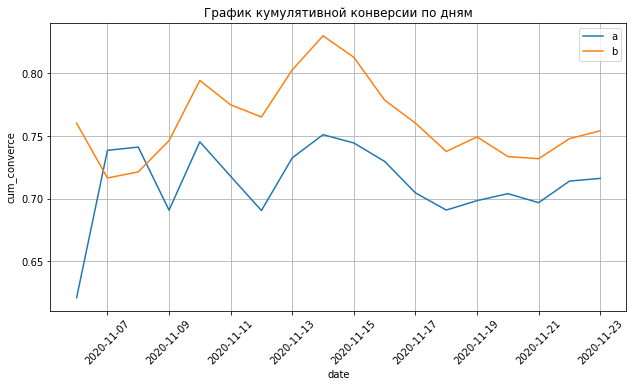

In [40]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_converce', data=daily_a, ax=ax)
sns.lineplot(x='date', y='cum_converce', data=daily_b, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.legend(['a', 'b']);
ax.grid(True);

Строим график кумулятивного среднего чека в каждой группе

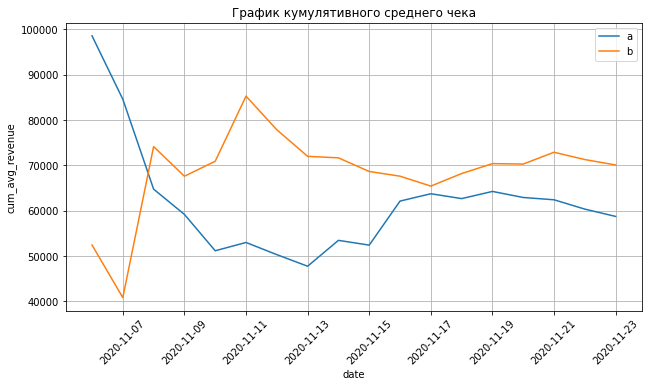

In [41]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_avg_revenue', data=daily_a, ax=ax)
sns.lineplot(x='date', y='cum_avg_revenue', data=daily_b, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивного среднего чека')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.legend(['a', 'b']);
ax.grid(True);